# Wine Dataset for Clustering

Esta notebook está hecha a apartir de [esta publicación de SAMUEL CORTINHAS en Kaggle](https://www.kaggle.com/code/samuelcortinhas/intro-to-pca-t-sne-umap).

In [3]:
# Core
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# UMAP
import umap
# import umap.plot 

# Data. Análisis Exploratorio

In [4]:
data = pd.read_csv('wine-clustering.csv')
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
data.sample(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


In [12]:
(data
 .isna()
 .sum()
 .sum()
 )
# no hay datos faltantes entre las 13 features, 178 observaciones

0

In [11]:
(data
 .duplicated()
 .sum()
 )

0

In [15]:
(np.round(100*data.duplicated().sum()/len(data),1))

0.0

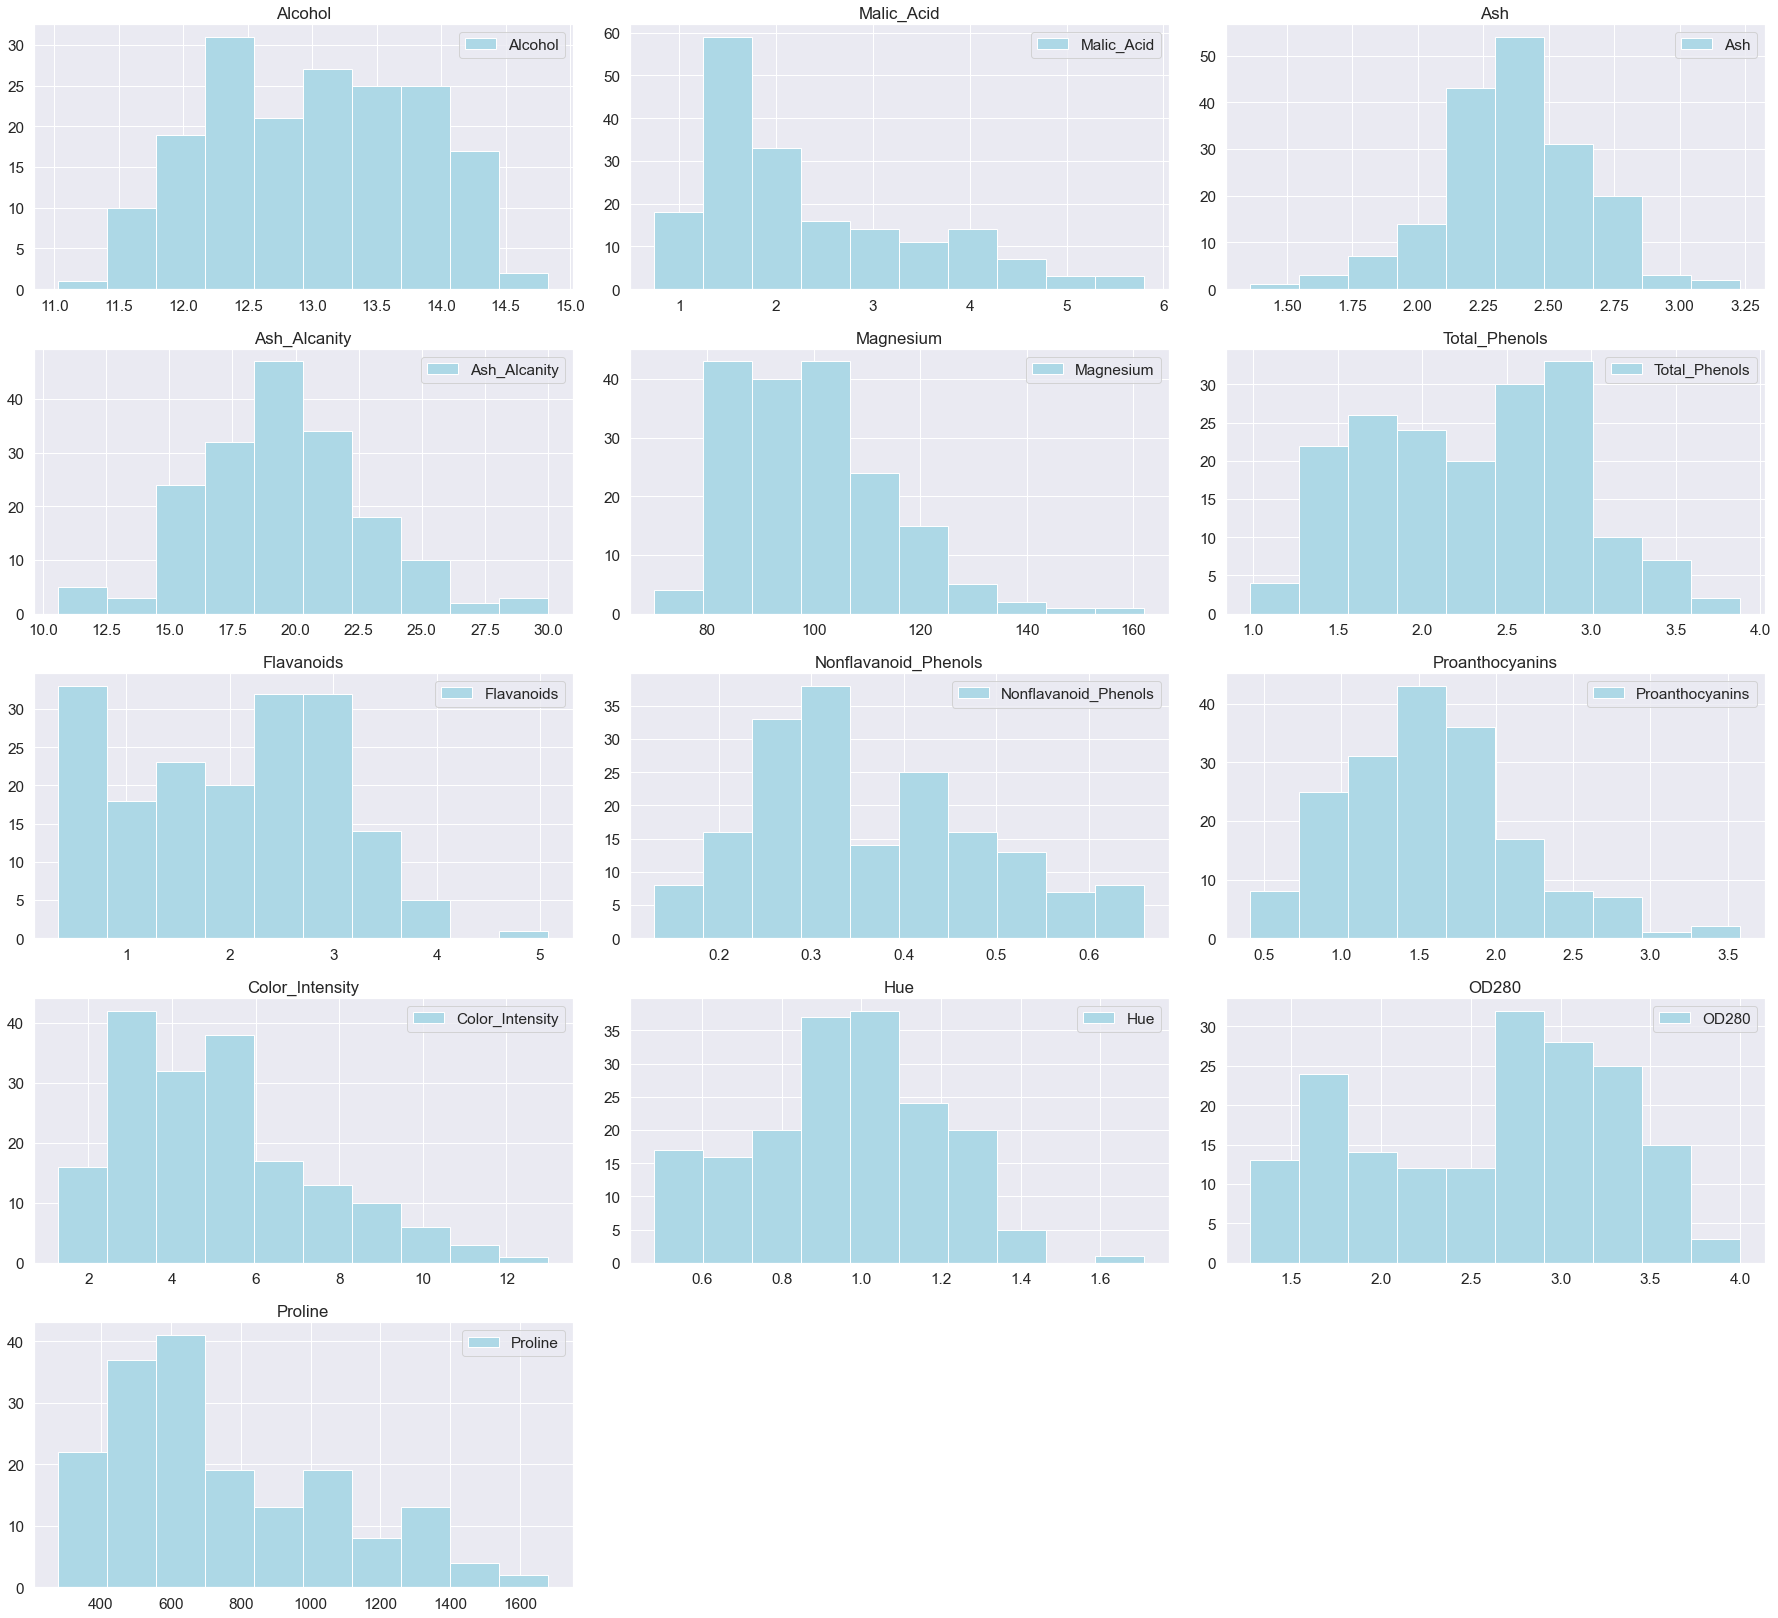

In [31]:
plt.figure(figsize=(25,45))
try:
    for i, col in enumerate(data.columns.to_list()):
        plt.subplot(10, 3, i + 1)
        plt.hist(data[col], label=col, color='lightBlue')
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

## Escalado
Recordar que siempre conviene escalar los datos antes de utiliar, por ejemplo PCA.

In [35]:
# 1. Instanciamos la clase StandardScaler
SS = StandardScaler()

# 2. Aplicamos la transformación a los datos y los pasamos a DF
X = pd.DataFrame(data = SS.fit_transform(data), columns= data.columns)
X.sample(3)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
147,-0.161348,2.040973,0.414820,0.602088,-0.964842,-0.953567,-1.384741,0.871420,-1.280596,1.121183,-1.831492,-1.061713,-0.388168
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711


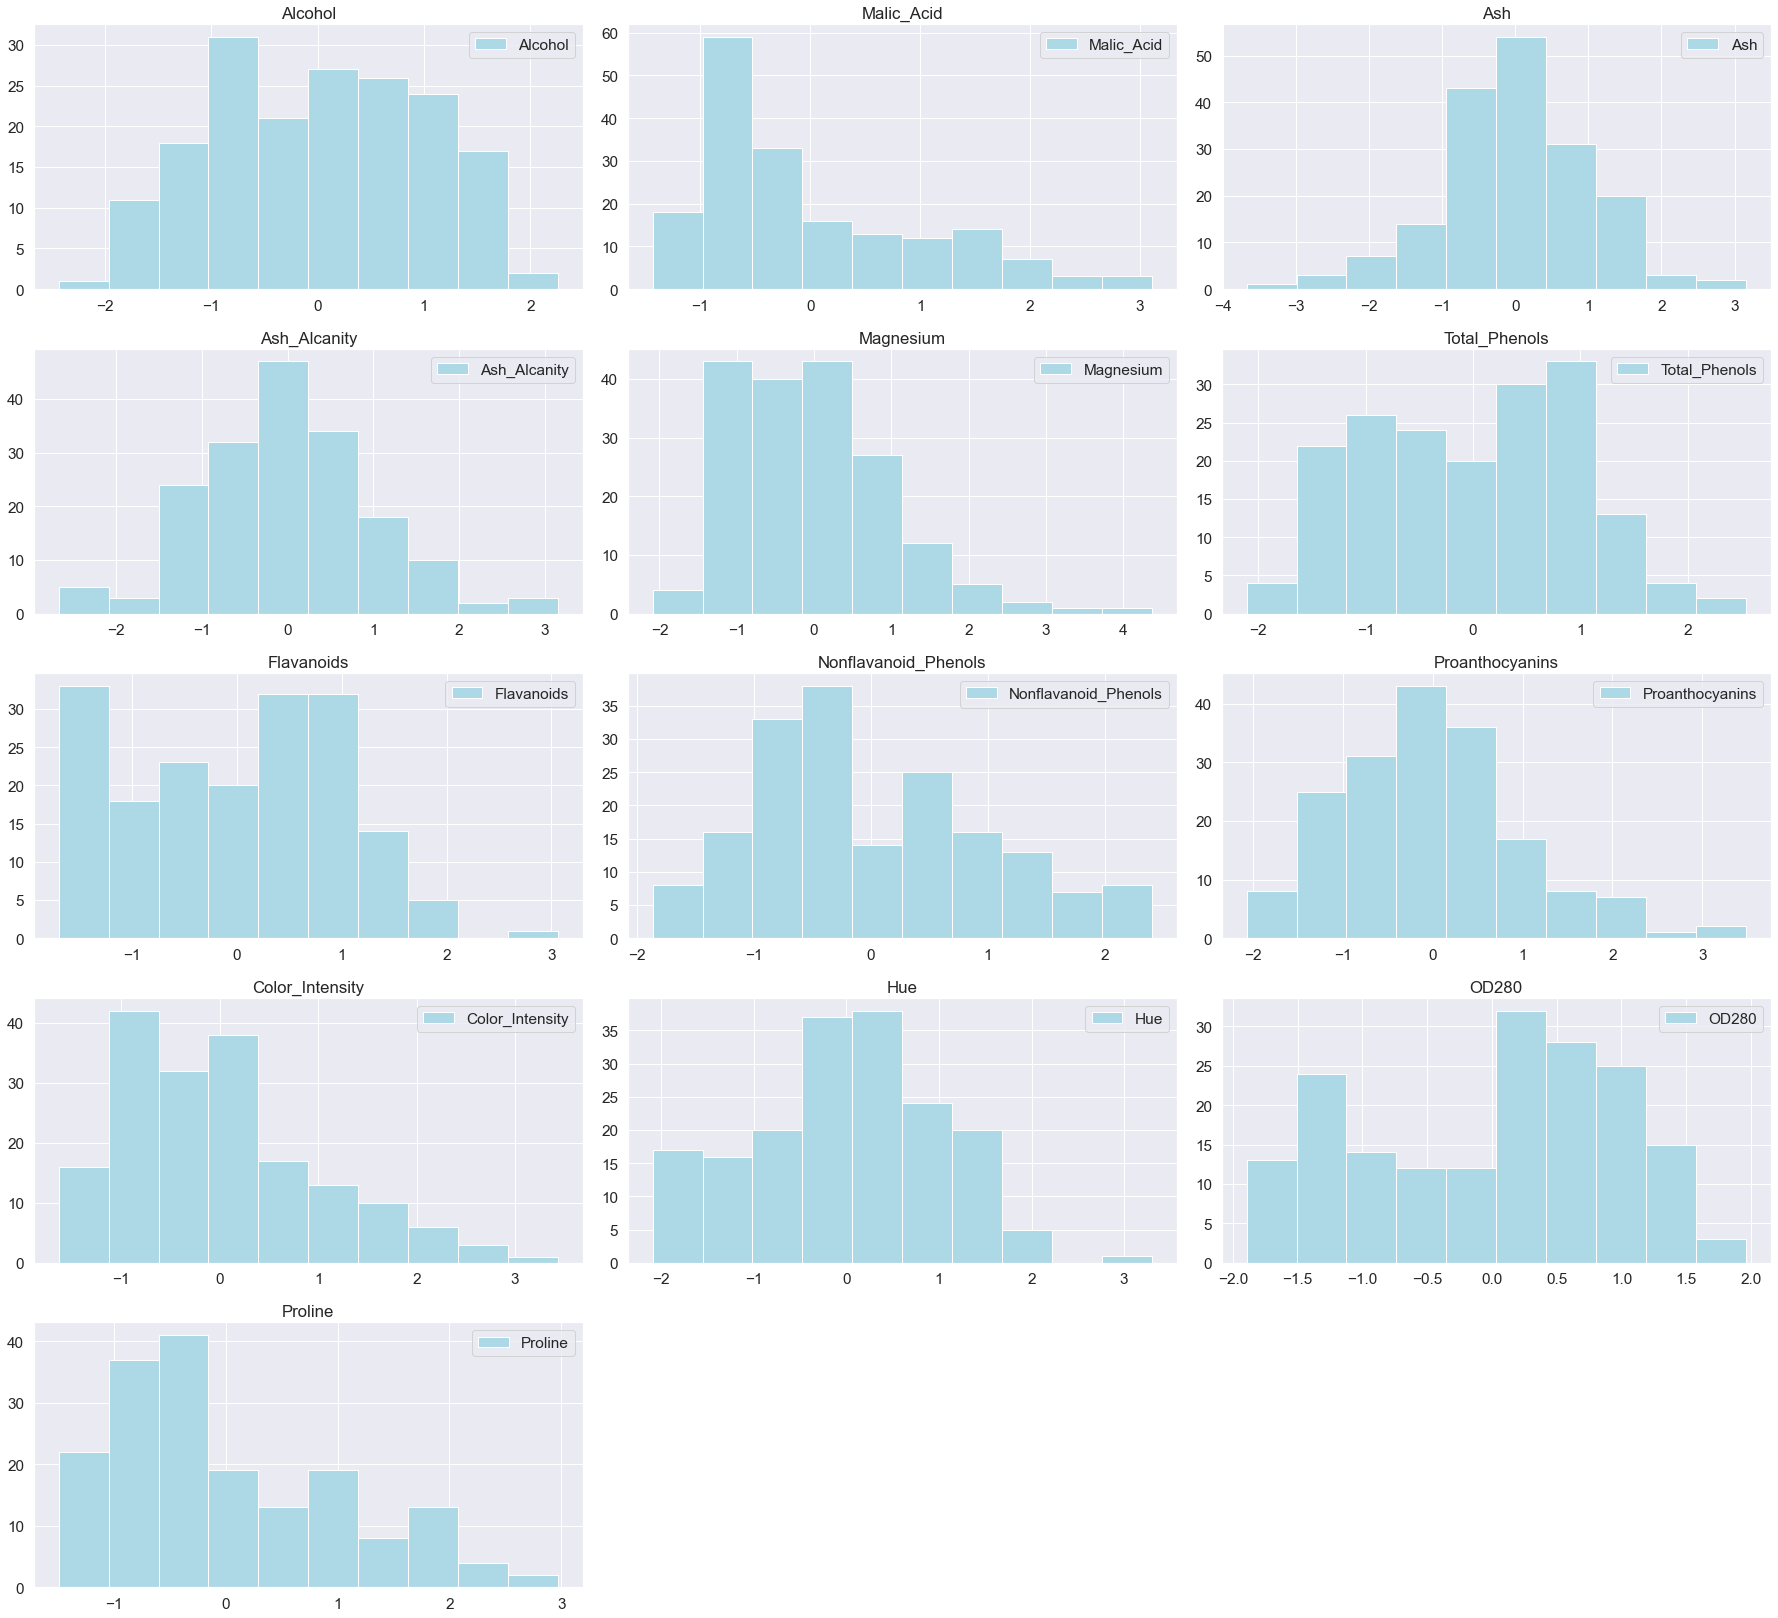

In [32]:
plt.figure(figsize=(25,45))
try:
    for i, col in enumerate(X.columns.to_list()):
        plt.subplot(10, 3, i + 1)
        plt.hist(X[col], label=col, color='lightBlue')
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

# PCA

In [34]:
# 1. Instanciamos la clase PCA y definimos el número de componentes hasta donde queremos reducir la dimensionalidad
pca = PCA(n_components=2, random_state=0)


# 2. Aplicamos la transformación
X_pca = pca.fit_transform(X)
X_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [36]:
# 3. Convertimos la matriz que obtuvimos en una DF
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1','PC2'])
principal_df.sample(3)

,PC1,PC2
10,3.479737,-1.302333
96,-0.543953,0.368927
177,-3.208758,-2.768920


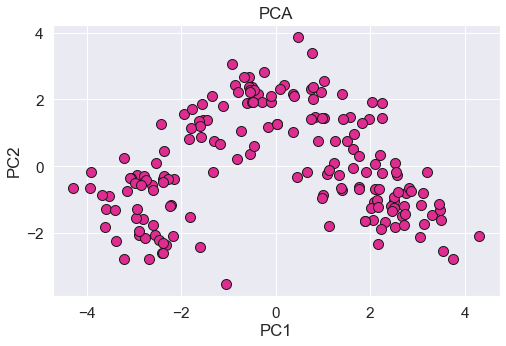

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[: , 0],X_pca[: , 1],
            edgecolors = 'k',
            s=100,            
            c='#de2c91'
            )
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Ahora vamos a aplicar un método de clustering NO supervisado para encontrar los grupos en los que se podría dividir este conjunto de datos

### K-means

In [74]:
# 1. Instanciamos la clase KMeans y definimos los hiperperámetros
kmeans = KMeans(n_clusters=3,
                n_init=15,
                max_iter=500,
                random_state=0)

# 2. Asignamos las las clases a cada observación
clusters = kmeans.fit_predict(X)

In [75]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [76]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

c:\Users\nico.-\miniconda3\envs\DiploDatos_No_Supervisado\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [77]:
centroids_pca

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03]])

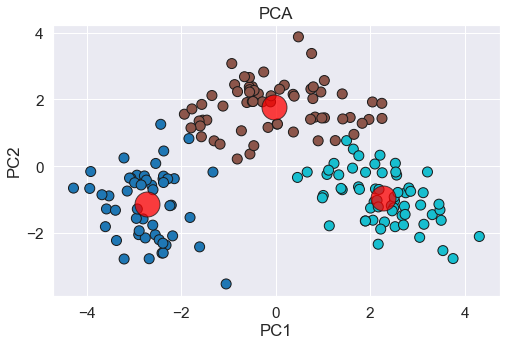

In [78]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[: , 0],X_pca[: , 1],
            edgecolors = 'k',
            c = clusters,
            s=100,            
            cmap='tab10'
            )

# graficamos el centro de los clusters.
plt.plot(centroids_pca[:,0], centroids_pca[:,1],
         'o',
         markerfacecolor='red',
         markeredgecolor='k',
         markersize=25,
         alpha=0.75)

plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Notar lo que nos permite PCA es llevar los datos a un espacio de 2 dimensiones en el que es posible representar los clusters en la pantalla de la computadora, para que sea visible para nuestro ojo humano (también podríamos hacerlo en 3 dimensiones). Pero el algoritmo de K-means no utilizó el resultado de PCA para realizar la búsqueda de clusters.
La visualización lo que confirma es que en este dataset es posible encontrar 3 clusters, esta división tiene sentido desde el punto de vista del problema que estamos tratando de resolver.
En la desición de cuántos clusters usar hay mucho de conocimiento de dominio. Porque también podríamos dividir estos datos en 2 clusters y el resultado va a ser igualmente bueno.

### PCA con 3 componentes
Esto nos va a permitir visualizar el resultado de el algoritmo de K-means en 3 dimensiones.

In [64]:
# PCA con 3 componentes
pca = PCA(n_components=3, random_state=0)
components = pca.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components,
    x=0, y=1, z=2,
    color=clusters,
    size=0.1*np.ones(len(X)),
    opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()

## t-SNE t-distributed Stochastic Neighbor Embedding

In [106]:
# 1. Instanciamos la clase tsne y definimos el numero de componentes hasta donde queremos hacer la reducción de la dimensionalidad
tsne = TSNE(n_components=2)

# 2. Aplicamos la transformacion a los datos escalados
X_tsne = tsne.fit_transform(X)

c:\Users\nico.-\miniconda3\envs\DiploDatos_No_Supervisado\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\nico.-\miniconda3\envs\DiploDatos_No_Supervisado\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [107]:
X_tsne[:5]

array([[ 6.774021  , -7.6675906 ],
       [ 7.4807544 , -0.75497365],
       [ 5.545532  , -4.9349256 ],
       [ 9.656273  , -6.2030373 ],
       [ 3.4783447 , -3.2724752 ]], dtype=float32)

In [108]:
tsne_df = pd.DataFrame(data = X_tsne, columns=['tsne comp. 1', 'tsne comp. 2'])
tsne_df.sample(3)

,tsne comp. 1,tsne comp. 2
64,-5.961065,4.038186
150,-13.719881,10.777730
177,-11.000819,13.602561


Importante: Notar que en esta notebook estamos analizando diferentes formas de reducción de la dimensionalidad pero, independientemente de método elijamos, el algoritmo de K-means va a dar siempre el mismo resultado, porque lo estamos aplicando sobre los datos SIN NINGUNA REDUCCIÓN DE LA DIMENSIONALIDAD. 
Dado que en este caso el dataset es muy chico, no tiene sentido aplicar la reducción de la dimensionalidad ANTES de aplicarlos algoritmos de clusterin. Esto sí podría ser algo importante si tuviéramos un dataset muy grande con muchímimas dimensiones. 

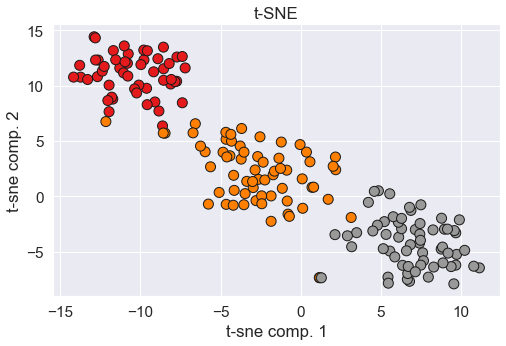

In [109]:
plt.figure(figsize=(8,5))
plt.scatter(X_tsne[: , 0],X_tsne[: , 1],
            edgecolors = 'k',
            c = clusters,
            s=100,            
            cmap='Set1'
            )

# graficamos el centro de los clusters.
# plt.plot(centroids_pca[:,0], centroids_pca[:,1],
#          'o',
#          markerfacecolor='red',
#          markeredgecolor='k',
#          markersize=25,
#          alpha=0.75)

plt.title('t-SNE')
plt.xlabel('t-sne comp. 1')
plt.ylabel('t-sne comp. 2')
plt.show()

## UMAP Uniform Manifold Approximation and Projection

In [111]:
# 1. Instanciamos la clase UMAP
um = umap.UMAP(n_components=2)

# 2. Aplicamos la transformacion
X_umap = um.fit_transform(X)

In [112]:
X_umap[:5]

array([[8.022457 , 4.613655 ],
       [7.1170235, 3.7336798],
       [7.7461815, 2.8352737],
       [8.810513 , 3.2158396],
       [6.7427845, 2.1049132]], dtype=float32)

In [115]:
# Centroids
centroids_umap = um.transform(centroids)

In [116]:
centroids_umap[:5]

array([[-2.6054003,  0.6391542],
       [ 2.2352178,  2.375385 ],
       [ 7.267597 ,  3.2002368]], dtype=float32)

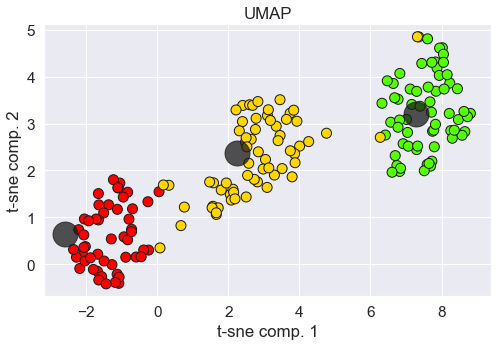

In [119]:
plt.figure(figsize=(8,5))
plt.scatter(X_umap[: , 0],X_umap[: , 1],
            edgecolors = 'k',
            c = clusters,
            s=100,            
            cmap='prism'
            )

# graficamos el centro de los clusters.
plt.plot(centroids_umap[:,0], centroids_umap[:,1],
         'o',
         markerfacecolor='k',
         markeredgecolor='k',
         markersize=25,
         alpha=0.75)

plt.title('UMAP')
plt.xlabel('t-sne comp. 1')
plt.ylabel('t-sne comp. 2')
plt.show()